In [1]:
import pandas as pd
from prophet import Prophet

/usr/lib/python3/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('dataset.csv')
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [3]:
df['Year'] = df['Time Date'].apply(lambda x : str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x : str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'] + '-' + df['Day'])
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']
df

,y,ds
0,2926.000000,2018-01-01
1,2687.531000,2018-01-02
2,2793.000000,2018-01-03
3,2394.000000,2018-01-04
4,2660.000000,2018-01-05
...,...,...
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15


In [4]:
m = Prophet(interval_width=0.95 ,daily_seasonality=True)
model = m.fit(df)

11:38:37 - cmdstanpy - INFO - Chain [1] start processing
11:38:38 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
forecast = m.make_future_dataframe(periods=365, include_history=False, freq='D')
forecast

,ds
0,2020-12-17
1,2020-12-18
2,2020-12-19
3,2020-12-20
4,2020-12-21
...,...
360,2021-12-12
361,2021-12-13
362,2021-12-14
363,2021-12-15


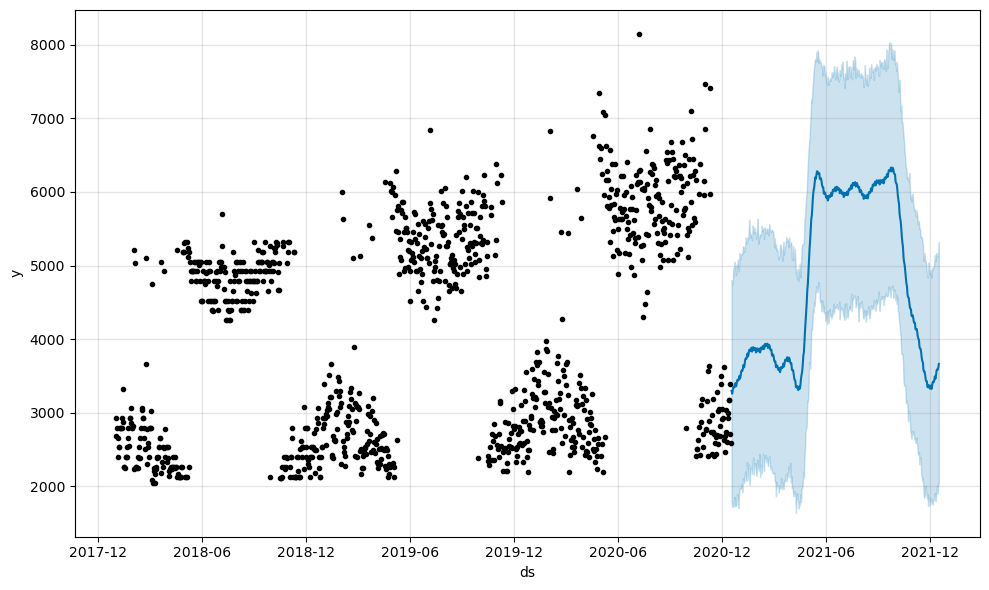

In [6]:
predictions = model.predict(forecast)
plot1 = m.plot(predictions)


In [17]:
forecast1 = m.make_future_dataframe(periods=1000, include_history=False, freq='D')
forecast1.shape
